### DATASET IS OBTAINED FROM KAGGLE, HERE IS THE LINK:
https://www.kaggle.com/vaishnaviasonawane/indian-sign-language-dataset

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage import io
from skimage import transform
from skimage import color
from skimage import filters

## Skin color segmentation

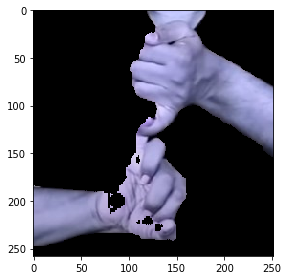

In [61]:
# Required modules
import cv2
import numpy as np
import matplotlib.pyplot as plt

min_YCrCb = np.array([0,133,77],np.uint8)
max_YCrCb = np.array([235,173,127],np.uint8)

# Get pointer to video frames from primary device
pa = "C:/Users/gautam bhatia/testing-images/S.jpg"
pd = "D:/data/S/0.jpg"
image = cv2.imread(pa)
imageYCrCb = cv2.cvtColor(image,cv2.COLOR_BGR2YCR_CB)
skinRegionYCrCb = cv2.inRange(imageYCrCb,min_YCrCb,max_YCrCb)

skinYCrCb = cv2.bitwise_and(image, image, mask = skinRegionYCrCb)

# cv2.imwrite("D:\skin_img\skin.png", np.hstack([image,skinYCrCb]))
#cv2.imwrite("D:\skin_img\skin4.png", skinYCrCb)
io.imshow(skinYCrCb)

In [62]:
skinYCrCb.shape

(258, 252, 3)

In [64]:
#plt.imshow(cv2.Canny(x_data[0],60,60), cmap='gray')

In [66]:
#cv2.imread(pd)

## Reading images

In [ ]:
# # reading images
# import os
# folder = os.listdir("D:/data/")
# k=1
# #fig = plt.figure(figsize=(15, 10))
# for i in folder:
#     sub=os.listdir("D:/data/"+i)
#     for j in sub:
#         print("D:/data/"+i+"/"+j)
#         print()
#         k+=1
# #         img = io.imread("D:/data/"+i+"/"+j)
# #         fig.add_subplot(5,2,k)
# #         plt.imshow(img)
# #         k+=1
# #         if(k==10):
# #             break
# #     if(k==10):
# #         break

### Normal method

In [68]:
# reading images using glob
import glob
paths = glob.glob("D:/data/*")

rgb_images=[]
for i in paths:
    alpha_paths = glob.glob(i+"/*")
    for j in alpha_paths:
        img = io.imread(j)
        rgb_images.append(img)
#         tr = transform.resize(img, (28,28))
#         gray = color.rgb2gray()

In [ ]:
rgb_images[0].shape
plt.imshow(rgb_images[0])

## Data preprocessing

In [ ]:
# resizing images to rgb=28x28x3
resized_images=[]
for i in rgb_images:
    r=transform.resize(i, (28,28))
    resized_images.append(r)

In [ ]:
resized_images = np.array(resized_images)
# np.save("rgb_resized_dataset.npy", resized_images)
# rx_data = np.load()

In [ ]:
resized_images[0].shape
plt.imshow(resized_images[0])

In [ ]:
# converting to grey scale 28x28
grey_images=[]
for i in resized_images:
    g=color.rgb2grey(i)
    grey_images.append(g)

In [ ]:
grey_images[0].shape
plt.imshow(grey_images[0], cmap="gray")

In [ ]:
# preprocessed images 
#x_data = np.load("data_handsigns.npy")
x_data=np.array(grey_images)
#np.save("data_handsigns.npy", x_data)

In [ ]:
x_data.shape

In [ ]:
# converting to binary image 28*28
# bin_images=[]
# for i in grey_images:    
#     thresh = filters.threshold_otsu(i)
#     b = i > thresh
#     bin_images.append(b)

In [ ]:
# bin_images=np.array(bin_images)

In [ ]:
# bin_images.shape
# bin_images[6578]
# plt.imshow(bin_images[34000], cmap="gray")

In [14]:
# preprocessed binary images
#np.save("bin_dataset.npy", bin_images)
xb_data = np.load('bin_dataset.npy')
xb_data.shape

(42000, 28, 28)

In [ ]:
# x = io.imread("D:/data/1/0.jpg")
# plt.imshow(x, cmap="gray")

In [ ]:
# x

In [ ]:
# tr = transform.resize(x, (28,28))
# tr

In [ ]:
# plt.imshow(tr)

In [ ]:
# c = color.rgb2gray(tr)
# c.shape

In [ ]:
# plt.imshow(c, cmap="gray")

In [ ]:
# import glob
# p = glob.glob("D:/data\\2/*")
# p
#c/255

In [ ]:
# plt.imshow(c, cmap="gray")

In [15]:
# making labels for images
labels = "123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"
y_data=[]

for i in range(0,35):
    for j in range(0,1200):
        y_data.append(i)
y_data = np.array(y_data)

In [16]:
y_data.shape

(42000,)

In [17]:
labels[y_data[34000]]

'T'

## Test images from internet

In [31]:
import glob
ph = glob.glob('testing-images/*')
xt=[]
yt_label='ADMORSTVVWZ'
yt_num = [0,1,2,3,4,5,6,7,8,9,10]

pixel = 28

for i in ph:
    img = io.imread(i)
    tr = transform.resize(img, (pixel,pixel))
    g = color.rgb2gray(tr)
    thresh = filters.threshold_otsu(g)
    b = (g > thresh)
    xt.append(b)
xt=np.array(xt).reshape(11, pixel**2)
# np.save("test_data.npy", xt)
# xt = np.load('test_data.npy')
print(xt.shape)

(11, 784)


In [ ]:
plt.imshow(xt[9].reshape(pixel,pixel), cmap="gray"), yt_label[9]

 ## Data splitting

In [18]:
# Split the dataset into training and testing 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=10)

# Print the shape of features and target of training and testing: X_train, X_test, y_train, y_test
x_train_shape = x_train.shape
y_train_shape = y_train.shape
x_test_shape  = x_test.shape
y_test_shape  = y_test.shape

print(f"x_train: {x_train_shape} , y_train: {y_train_shape}")
print(f"x_test: {x_test_shape} , y_test: {y_test_shape}")

x_train: (25200, 28, 28) , y_train: (25200,)
x_test: (16800, 28, 28) , y_test: (16800,)


In [19]:
# flattening images
x_train = x_train.reshape(25200, 784)
x_test = x_test.reshape(16800, 784)

In [20]:
x_train.shape, x_test.shape

((25200, 784), (16800, 784))

## Classification using simple NN

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras

In [22]:
# one-hot encoding on images labels
y_train_cat = keras.utils.to_categorical(y_train, 35)
y_test_cat = keras.utils.to_categorical(y_test, 35)

num_classes = 35

In [23]:
y_train_cat.shape

(25200, 35)

In [24]:
y_train_cat, y_train

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([26, 33,  3, ..., 24, 33, 14]))

In [25]:
# Neural network
model = Sequential()
model.add(Dense(126, activation='relu', input_shape=(784,)))
#model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

model.compile(loss="CategoricalCrossentropy",
              optimizer="adam",
              metrics=["accuracy"])

# training
history = model.fit(x_train, y_train_cat,
                    #validation_split=0.2,
                    validation_data=(x_test, y_test_cat),
                    shuffle=True,
                    batch_size=128,
                    epochs=10,
                    verbose=1)

score1 = model.evaluate(x_train, y_train_cat, verbose=0)
print('Train loss:', score1[0])
print('Train accuracy:', score1[1])

score2 = model.evaluate(x_test, y_test_cat, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 126)               98910     
                                                                 
 dense_1 (Dense)             (None, 35)                4445      
                                                                 
Total params: 103,355
Trainable params: 103,355
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
197/197 [==============================] - 1s 3ms/step - loss: 0.6426 - accuracy: 0.9092 - val_loss: 0.0516 - val_accuracy: 0.9980
Epoch 2/10
197/197 [==============================] - 0s 2ms/step - loss: 0.0270 - accuracy: 0.9990 - val_loss: 0.0155 - val_accuracy: 0.9995
Epoch 3/10
197/197 [==============================] - 0s 2ms/step - loss: 0.0099 - accuracy: 0.9998 - val_loss: 0.0074 - val_accuracy: 0.9996
Epoch 4/10
197/

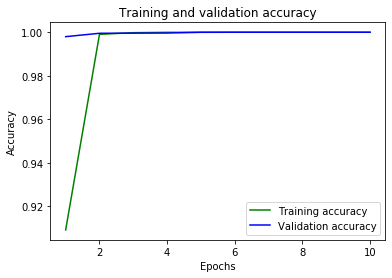

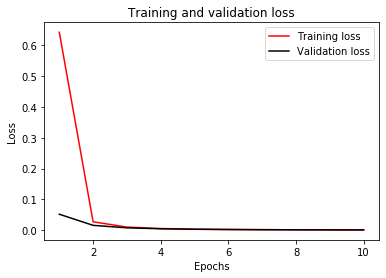

In [26]:
# plotting training results
# import seaborn as sns
# sns.set()
epochs = range(1,11)

# accuracy
plt.plot(epochs, history.history['accuracy'], color="green", label="Training accuracy")
plt.plot(epochs, history.history['val_accuracy'], color='blue', label='Validation accuracy')
plt.title("Training and validation accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.savefig("D:/graphs/acc_sgd_mse.jpg")

# loss
plt.figure()
plt.plot(epochs, history.history['loss'], color="red", label="Training loss")
plt.plot(epochs, history.history['val_loss'], color='black', label='Validation loss')
plt.title("Training and validation loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig("D:/graphs/loss_sgd_mse.jpg")

In [27]:
# TESTING single image

# test=[]
# test.append(x_test[-1])
# test=np.array(test)
index = 3
prediction = model.predict(x_test)
pred=prediction[index]
print("predicition\n", pred)
thres_pred = (pred>0.5)*1
print("\nThreshold predicition\n", thres_pred)

predicition
 [6.5796307e-08 4.3053994e-12 8.9680867e-09 1.1019111e-09 1.9626911e-09
 2.6650099e-05 7.2233162e-09 1.9008004e-07 8.2854443e-09 1.7076447e-08
 3.6848928e-07 7.9718538e-06 2.0369026e-08 1.5671371e-07 4.4461181e-09
 1.5768842e-06 2.7511396e-06 2.8579100e-06 1.4342085e-07 4.1618758e-10
 7.0787387e-10 5.0610822e-07 6.8326007e-09 2.2285023e-11 5.0415150e-05
 4.8549421e-11 2.6883592e-07 2.9806545e-06 1.5940195e-06 3.3539527e-07
 1.3573214e-06 9.4069092e-06 3.4783014e-09 9.9989033e-01 1.1279545e-08]

Threshold predicition
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


num: 33
predicted label= Y
33
actual= Y


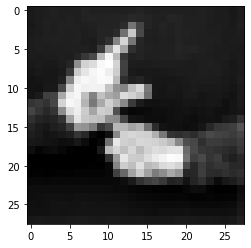

In [28]:
y_num = np.where(thres_pred==1)[0][0]
print("num:",y_num)
print("predicted label=", labels[y_num])

# checking
print(y_test[index])
print("actual=",labels[y_test[index]])
plt.imshow(x_test[index].reshape(28,28), cmap="gray")
#plt.savefig("D:/graphs/Y_nn_test.jpg")

In [ ]:
#x_test[28]

In [29]:
# getting predicted labels for all samples of testing-data
thr = (prediction>0.5)*1
y_pred_nn = np.where(thr==1)[1]
y_pred_nn

array([22, 15, 34, ..., 33,  1,  6], dtype=int64)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
[6.7222610e-09 0.0000000e+00 2.6430450e-13 3.5145048e-33 4.0852370e-20
 7.2160939e-15 1.6883666e-29 2.4444869e-02 2.6315577e-12 3.7786679e-04
 1.6378758e-37 2.6418646e-14 2.4644945e-18 3.3003906e-07 8.3612722e-06
 1.8476082e-28 1.3770689e-22 1.2625600e-24 3.0848256e-03 2.7627413e-22
 1.2457516e-19 8.1912042e-15 1.3363625e-36 4.5713796e-33 3.6350322e-23
 8.4895699e-09 9.7208369e-01 5.4979811e-08 4.7618923e-23 2.2223902e-30
 0.0000000e+00 2.5398708e-22 0.0000000e+00 8.7269857e-21 7.0122607e-18]
(array([26], dtype=int64),)
predicted: R
actual: W


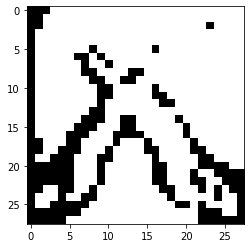

In [32]:
# TESTING ON INTERNET IMAGES
get = 9
z = model.predict(xt)
s = z[get]
tr = (s>0.5)*1
print(tr)
print(s)
print(np.where(tr==1))
print("predicted:",labels[np.where(tr==1)[0][0]])
print("actual:",yt_label[get])
plt.imshow(xt[get].reshape(28,28), cmap='gray')

## Classification metrics for NN

In [33]:
# classfication metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
print("accuracy: ",accuracy_score(y_test, y_pred_nn))
print("Precision:", precision_score(y_test, y_pred_nn, average='macro'))
print("Recall:", recall_score(y_test, y_pred_nn, average='macro'))
print("F1_score:", f1_score(y_test, y_pred_nn, average='macro'))
print("confusion_matrix:\n", confusion_matrix(y_test, y_pred_nn))

accuracy:  1.0
Precision: 1.0
Recall: 1.0
F1_score: 1.0
confusion_matrix:
 [[500   0   0 ...   0   0   0]
 [  0 465   0 ...   0   0   0]
 [  0   0 481 ...   0   0   0]
 ...
 [  0   0   0 ... 494   0   0]
 [  0   0   0 ...   0 450   0]
 [  0   0   0 ...   0   0 496]]


## Comparing other classification models with NN

In [ ]:
# Perceptron
from sklearn.linear_model import Perceptron
per_model = Perceptron().fit(x_train, y_train)
y_pred_per = per_model.predict(x_test)
per_model.score(x_test, y_test)

In [ ]:
# TESTING 
get=89
z = per_model.predict(x_test[get:get+1])
z=z[0]
print("predicted:",labels[z])
print("actual:",labels[y_test[get]])

In [ ]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
reg_model = LogisticRegression().fit(x_train, y_train)
y_pred_log = reg_model.predict(x_test)
accuracy_score(y_test, y_pred_log)

In [ ]:
# TESTING 
get=89
z = reg_model.predict(x_test[get:get+1])
z=z[0]
print("predicted:",labels[z])
print("actual:",labels[y_test[get]])

In [ ]:
# Decision tree classifier model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(x_train, y_train)
y_pred_dct = clf.predict(x_test)

In [ ]:
# TESTING 
get=89
z = clf.predict(x_test[get:get+1])
z=z[0]
print("predicted:",labels[z])
print("actual:",labels[y_test[get]])

In [ ]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(random_state=0).fit(x_train, y_train)
y_pred_rfc = rfc_model.predict(x_test)

In [ ]:
# TESTING 
get=89
z = rfc_model.predict(x_test[get:get+1])
z=z[0]
print("predicted:",labels[z])
print("actual:",labels[y_test[get]])

In [ ]:
# AdaBoost model
from sklearn.ensemble import AdaBoostClassifier
adb_model = AdaBoostClassifier(n_estimators=50, random_state=0)
adb_model = adb_model.fit(x_train, y_train)
y_pred_adb = adb_model.predict(x_test)

In [ ]:
# TESTING 
get=89
z = adb_model.predict(x_test[get:get+1])
z=z[0]
print("predicted:",labels[z])
print("actual:",labels[y_test[get]])

In [ ]:
# GradientBoost model
from sklearn.ensemble import GradientBoostingClassifier
gdb = GradientBoostingClassifier(random_state=0, max_features='sqrt').fit(x_train, y_train)
y_pred_gdb = gdb.predict(x_test)

In [ ]:
# TESTING 
get=89
z = gdb.predict(x_test[get:get+1])
z=z[0]
print("predicted:",labels[z])
print("actual:",labels[y_test[get]])

In [ ]:
# svm.LinearSVC (linear)
from sklearn.svm import LinearSVC 
linearSVC_model = LinearSVC()
linearSVC_model.fit(x_train, y_train)
y_pred_linearsvc = linearSVC_model.predict(x_test)

In [ ]:
# TESTING 
get=89
z = linearSVC_model.predict(x_test[get:get+1])
z=z[0]
print("predicted:",labels[z])
print("actual:",labels[y_test[get]])

## CNN

In [ ]:
from tensorflow.keras import layers

In [ ]:
x_data.shape

In [ ]:
x_data_cnn = x_data.reshape(42000, 28, 28, 1)
x_data_cnn.shape

In [ ]:
# Split the dataset into training and testing 
from sklearn.model_selection import train_test_split
x_train_cnn, x_test_cnn, y_train_cnn, y_test_cnn = train_test_split(x_data_cnn, y_data, test_size=0.4, random_state=10)

# Print the shape of features and target of training and testing: X_train, X_test, y_train, y_test
x_train_cnn_shape = x_train_cnn.shape
y_train_cnn_shape = y_train_cnn.shape
x_test_cnn_shape  = x_test_cnn.shape
y_test_cnn_shape  = y_test_cnn.shape

print(f"x_train_cnn: {x_train_cnn_shape} , y_train_cnn: {y_train_cnn_shape}")
print(f"x_test_cnn: {x_test_cnn_shape} , y_test_cnn: {y_test_cnn_shape}")

In [ ]:
# one-hot encoding on images labels
y_train_hot = keras.utils.to_categorical(y_train_cnn, 35)
y_test_hot = keras.utils.to_categorical(y_test_cnn, 35)

In [ ]:
y_train_hot.shape

In [ ]:
y_train_hot, y_train_cnn

In [ ]:
# CNN
cnn_model = Sequential()

cnn_model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation = 'relu', input_shape=(28,28,1) ))
cnn_model.add(layers.MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(layers.Conv2D(64, kernel_size = (3, 3), padding='same', activation = 'relu'))
cnn_model.add(layers.MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(layers.Conv2D(64, kernel_size = (3, 3), padding='same', activation = 'relu'))
cnn_model.add(layers.MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(128, activation = 'relu'))
cnn_model.add(layers.Dropout(0.20))
cnn_model.add(layers.Dense(35, activation = 'softmax'))

cnn_model.summary()

# Compile Model
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

# Train Model
batch_size = 128
num_epochs = 10

history = cnn_model.fit(x_train_cnn, y_train_hot, 
                        batch_size=batch_size, 
                        epochs=num_epochs, 
                        validation_data=(x_test_cnn, y_test_hot)
                       )

# Testing
score1 = cnn_model.evaluate(x_train_cnn, y_train_hot, verbose=0)
print('Train loss:', score1[0])
print('Train accuracy:', score1[1])

score2 = cnn_model.evaluate(x_test_cnn, y_test_hot, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

In [ ]:
# plotting training results
#import seaborn as sns
# sns.set()
epochs = range(1,11)

# accuracy
plt.plot(epochs, history.history['accuracy'], color="green", label="Training accuracy")
plt.plot(epochs, history.history['val_accuracy'], color='blue', label='Validation accuracy')
plt.title("CNN-Training and validation accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
#plt.savefig("D:/graphs/acc_rms_cat_cnn.jpg")

# loss
plt.figure()
plt.plot(epochs, history.history['loss'], color="red", label="Training loss")
plt.plot(epochs, history.history['val_loss'], color='black', label='Validation loss')
plt.title("CNN-Training and validation loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.savefig("D:/graphs/loss_rms_cat_cnn.jpg")

In [ ]:
# TESTING single image
index = 7
cnn_prediction = cnn_model.predict(x_test_cnn)
cnn_pred=cnn_prediction[index]
print("predicition\n", cnn_pred)
t = (cnn_pred>0.5)*1
print("\nThreshold predicition\n", t)

In [ ]:
yn = np.where(t==1)[0][0]
print("index:",yn)
print("predicted label=", labels[yn])

# checking
print(y_test[index])
print("actual:",labels[y_test[index]])
plt.imshow(x_test[index].reshape(28,28), cmap="gray")
#plt.savefig("D:/graphs/b_cnn_test.jpg")

In [ ]:
# getting predicted labels for all samples of testing-data
t = (cnn_prediction>0.5)*1
y_pred_cnn = np.where(t==1)[1]
y_pred_cnn

## Plotting testing Classfication Metrics for NN  vs  Different Models

In [ ]:
# Comparing accuracy score 

models = ['neuralNet', 'perceptron', 'logreg', 'decisiontree', 'randomforest', 'adaboost', 'gradboost', 'LinearSVC', 'CNN']
a = [accuracy_score(y_test, y_pred_nn),
     accuracy_score(y_test, y_pred_per), 
     accuracy_score(y_test, y_pred_log), 
     accuracy_score(y_test, y_pred_dct), 
     accuracy_score(y_test, y_pred_rfc), 
     accuracy_score(y_test, y_pred_adb), 
     accuracy_score(y_test, y_pred_gdb),  
     accuracy_score(y_test, y_pred_linearsvc),
     accuracy_score(y_test, y_pred_cnn)
     ]

plt.figure(figsize=(11,5))
plt.ylabel("Accuracy")
plt.xlabel("MODELS")
plt.title("Accuracy Comparison")
plt.bar(models, a, width=0.4)
#plt.savefig("D:/graphs/acc_comp.jpg")
plt.show()


In [ ]:
# Comparing precision score 

p = [precision_score(y_test, y_pred_nn, average='macro'),
     precision_score(y_test, y_pred_per, average='macro'), 
     precision_score(y_test, y_pred_log, average='macro'), 
     precision_score(y_test, y_pred_dct, average='macro'), 
     precision_score(y_test, y_pred_rfc, average='macro'), 
     precision_score(y_test, y_pred_adb, average='macro'), 
     precision_score(y_test, y_pred_gdb, average='macro'),  
     precision_score(y_test, y_pred_linearsvc, average='macro'),
     precision_score(y_test, y_pred_cnn, average='macro')
     
     ]
plt.figure(figsize=(11,5))
plt.ylabel("Precison")
plt.xlabel("MODELS")
plt.bar(models, p, width=0.4)
plt.title("Precision Comparison")
#plt.savefig("D:/graphs/pr_comp.jpg")
plt.show()

In [ ]:
# Comparing recall score 

r = [recall_score(y_test, y_pred_nn, average='macro'),
     recall_score(y_test, y_pred_per, average='macro'), 
     recall_score(y_test, y_pred_log, average='macro'), 
     recall_score(y_test, y_pred_dct, average='macro'), 
     recall_score(y_test, y_pred_rfc, average='macro'), 
     recall_score(y_test, y_pred_adb, average='macro'), 
     recall_score(y_test, y_pred_gdb, average='macro'),  
     recall_score(y_test, y_pred_linearsvc, average='macro'),
     recall_score(y_test, y_pred_cnn, average='macro')
     ]

plt.figure(figsize=(11,5))
plt.ylabel("Recall")
plt.xlabel("MODELS")
plt.bar(models, r, width=0.4)
plt.title("Recall Comparison")
#plt.savefig("D:/graphs/rc_comp.jpg")
plt.show()

In [ ]:
# Comparing F1-score 

f = [f1_score(y_test, y_pred_nn, average='macro'),
     f1_score(y_test, y_pred_per, average='macro'), 
     f1_score(y_test, y_pred_log, average='macro'), 
     f1_score(y_test, y_pred_dct, average='macro'), 
     f1_score(y_test, y_pred_rfc, average='macro'), 
     f1_score(y_test, y_pred_adb, average='macro'), 
     f1_score(y_test, y_pred_gdb, average='macro'),  
     f1_score(y_test, y_pred_linearsvc, average='macro'),
     f1_score(y_test, y_pred_cnn, average='macro')
     ]
plt.figure(figsize=(11,5))
plt.ylabel("F1-Score")
plt.xlabel("MODELS")
plt.bar(models, f, width=0.4)
plt.title("F1-Score Comparison")
#plt.savefig("D:/graphs/f1_comp.jpg")
plt.show()

### testing on net images

In [ ]:
get = 7
z = model.predict(xt)
s=z[get]
tr = (s>0.5)*1
# print(tr)
# print(s)
# print(np.where(tr==1)[0][0])
print("predicted:",labels[np.where(tr==1)[0][0]])
print("actual:",yt_label[get])

In [ ]:
xt_cnn = xt.reshape(11,28,28,1)
get=7
z = cnn_model.predict(xt_cnn)
s=z[get]
tr = (s>0.5)*1
# print(s)
# print(tr)
# print(np.where(tr==1)[0][0])
print("predicted:",labels[np.where(tr==1)[0][0]])
print("actual:",yt_label[get])

# Testing NLP

Actual sentence: IAMTIREDTODAY
letter:  I


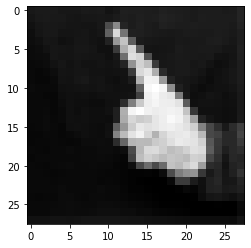

In [46]:
import glob
pixel = 28
letters = glob.glob("sentence_nlp_3/*")
alpha=[]

alpha_names=""
for i in range(0,len(letters)):
#     alpha_names.append(letters[i].split('-')[1][0])
      alpha_names+=letters[i].split('-')[1][0]
print("Actual sentence:",alpha_names)

for i in letters:
    img = io.imread(i)
    tr = transform.resize(img, (pixel,pixel))
    g = color.rgb2gray(tr)
    alpha.append(g)
alpha = np.array(alpha).reshape(len(letters),784)
print("letter: ",alpha_names[0])
plt.imshow(alpha[0].reshape(28,28), cmap="gray")

In [47]:
letters

['sentence_nlp_3\\1-I.jpg',
 'sentence_nlp_3\\10-A.jpg',
 'sentence_nlp_3\\10-M.jpg',
 'sentence_nlp_3\\2-T.jpg',
 'sentence_nlp_3\\21-I.jpg',
 'sentence_nlp_3\\22-R.jpg',
 'sentence_nlp_3\\23-E.jpg',
 'sentence_nlp_3\\24-D.jpg',
 'sentence_nlp_3\\3-T.jpg',
 'sentence_nlp_3\\31-O.jpg',
 'sentence_nlp_3\\4-D.jpg',
 'sentence_nlp_3\\5-A.jpg',
 'sentence_nlp_3\\6-Y.jpg']

In [48]:
# prediction Neural Network
pred_alpha=""
test_pred = model.predict(alpha)
for i in test_pred:
    thr = (i>0.5)*1
    #print(thr)
    let = labels[np.where(thr==1)[0][0]]
    pred_alpha+=let
    #print(np.where(thr==1)[0][0])
pred_alpha = pred_alpha.lower()+"."
print("Predicted sentence:",pred_alpha)

Predicted sentence: iamtiredtoday.


### Text to text translation

In [58]:
from translate import Translator
translator= Translator(to_lang="Hindi")
translation = translator.translate(pred_alpha)
print(translation)

मैं आज थक गया हूँ।


### google Text to speech 

In [60]:
from gtts import gTTS
from playsound import playsound
import os

mytext = translation
language = 'en'
myobj = gTTS(text=mytext, lang=language, slow=False)
# myobj.save("welcome.mp3")
# playsound("welcome.mp3")
#os.system("welcome.mp3")